In [176]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request 
import seaborn as sns

In [3]:
url='https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6'

In [4]:
tables=pd.read_html('https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6')

In [5]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")


In [6]:
all_tables=soup.find_all("table")

right_table=soup.find_all("table", class_="wikitable sortable")
actual_table=soup.find_all("tbody")
actual_table[0]

<tbody><tr>
<th>#
</th>
<th>Area<sup class="reference" id="cite_ref-BUA_4-0"><a href="#cite_note-BUA-4">[4]</a></sup><sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[note 1]</a></sup>
</th>
<th>Population<br/>(2011)
</th>
<th>Area (km<sup>2</sup>)<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[note 2]</a></sup>
</th>
<th>Density (People/km<sup>2</sup>)
</th>
<th class="unsortable">Primary sub-divisions<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[note 3]</a></sup>
</th>
<th>Notable changes from 2001 to 2011<sup class="reference" id="cite_ref-8"><a href="#cite_note-8">[5]</a></sup><sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[note 4]</a></sup>
</th></tr>
<tr>
<th>1
</th>
<td><span data-sort-value="London" style="display:none;"></span><a href="/wiki/Greater_London_Built-up_Area" title="Greater London Built-up Area">Greater London</a>
</td>
<td>9,787,426
</td>
<td>1,737.9
</td>
<td>5,630
</td>
<td><a href="/wiki/London_borough

In [7]:
table=soup.find('tbody')
headings=table.findAll('th',text="Area")
headings_list=[i.text for i in headings]
headings_list

[]

In [8]:
values=table.findAll('td')

In [9]:
headings_list

[]

In [10]:
Area=[]
Population=[]
Area_size=[]
Density=[]
Primary_sub_division=[]
Notable_changes_from_2001_to_2011=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        Area.append(cells[0].find(text=True))
        Population.append(cells[1].find(text=True))
        Area_size.append(cells[2].find(text=True))
        Density.append(cells[3].find(text=True))
        Primary_sub_division.append(cells[4].find(text=True))
        Notable_changes_from_2001_to_2011.append(cells[5].find(text=True))

In [11]:
df=pd.DataFrame(Area,columns=['Area'])
df['Population']=Population
df['Area_size']=Area_size
df['Density']=Density
df['Primary_sub_division']=Primary_sub_division
df['Notable_changes_from_2001_to_2011']=Notable_changes_from_2001_to_2011

In [12]:
df['Area_size']=df['Area_size'].str.replace('\n','')


Area_size_data = pd.DataFrame(df['Area_size'])

Area_size_data['City'] = df['Area']
Area_size_data['City'] = Area_size_data['City'].str.replace('Greater ', '')
Area_size_data['City'] = Area_size_data['City'].str.replace('/ Poole', '')
Area_size_data['City'] = Area_size_data['City'].str.replace('-on-Trent', '')
Area_size_data['City'] = Area_size_data['City'].str.replace('/ Dearne Valley', '')
Area_size_data['Area_size'] = Area_size_data['Area_size'].str.replace(',', '')
Area_size_data['Area_size'] = Area_size_data['Area_size'].str.replace('  ', '')

Area_size_data = Area_size_data.drop(11)


In [13]:
Area_size_data['Area_size'] = Area_size_data['Area_size'].astype(float)

In [14]:
data = 'https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/Centre_for_cities_full_data.csv'


In [15]:
dataset = pd.read_csv(data, encoding= 'unicode_escape',error_bad_lines=False)
df = pd.DataFrame(dataset)
df = df[:62]
df.columns = df.columns.str.replace('ï»¿', '')
df.columns = df.columns.str.replace('(ÃÂ£)', '')
df = df.drop(index=[4])
df

,City,Average Weekly Workplace Earnings 2004 (),Average Weekly Workplace Earnings 2005 (),Average Weekly Workplace Earnings 2006 (),Average Weekly Workplace Earnings 2007 (),Average Weekly Workplace Earnings 2008 (),Average Weekly Workplace Earnings 2009 (),Average Weekly Workplace Earnings 2010 (),Average Weekly Workplace Earnings 2011 (),Average Weekly Workplace Earnings 2012 (),...,Youth Claimant Count Feb 2020 (%),Youth Claimant Count Mar 2020 (%),Youth Claimant Count Apr 2020 (%),Youth Claimant Count May 2020 (%),Youth Claimant Count Jun 2020 (%),Youth Claimant Count Jul 2020 (%),Youth Claimant Count Aug 2020 (%),Youth Claimant Count Sep 2020 (%),Youth Claimant Count Oct 2020 (%),Youth Claimant Count Nov 2020 (%)
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,2.95,3.02,4.45,5.53,6.06,6.40,6.53,6.42,6.40,6.30
1,Aldershot,710.3336773,675.3955597,708.9879872,711.1096019,708.7800319,734.1569767,633.7902391,659.8120591,627.2442589,...,1.74,1.74,3.27,5.69,5.93,6.28,6.22,6.20,5.93,5.93
2,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,4.85,5.05,8.03,9.84,9.82,9.93,9.49,9.34,9.16,9.19
3,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,3.75,3.98,6.08,8.96,9.04,9.27,8.85,8.85,8.54,8.68
5,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,5.15,5.25,7.90,9.66,9.61,9.65,9.51,9.51,9.17,9.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Telford,505.751634,474.8717949,505.5137845,528.1173594,513.1205674,479.1666667,465.7334826,452.9474812,462.1085595,...,3.89,4.07,6.95,8.25,8.28,8.46,8.46,8.46,8.25,8.25
58,Wakefield,482.745098,493.2051282,505.2631579,519.3154034,489.5981087,469.0972222,481.8589026,469.6677385,454.8016701,...,4.61,4.82,7.04,9.03,9.03,9.28,8.92,8.95,8.90,8.69
59,Warrington,540.2614379,546.5384615,510.7769424,591.6870416,609.2198582,544.212963,584.0985442,558.7352626,483.7160752,...,2.94,2.94,5.38,6.73,6.71,6.81,6.78,6.78,6.71,6.55
60,Wigan,452.1568627,465.3846154,474.6867168,505.8679707,483.56974,465.0462963,459.6864502,426.6881029,429.5407098,...,4.99,5.22,7.78,9.28,9.15,9.43,9.30,9.14,9.01,8.96


In [16]:
df2 = pd.merge(df, Area_size_data, how='inner')
df2.columns = df2.columns.str.replace(' ', '_')



In [17]:
df2['Density__2015'] = df2['Population_2015'] / df2['Area_size']
df2['Density__2016'] = df2['Population_2016'] / df2['Area_size']
df2['Density__2017'] = df2['Population_2017'] / df2['Area_size']
df2['Density__2018'] = df2['Population_2018'] / df2['Area_size']
df2['Density__2019'] = df2['Population_2019'] / df2['Area_size']
df2

,City,Average_Weekly_Workplace_Earnings_2004__(),Average_Weekly_Workplace_Earnings_2005__(),Average_Weekly_Workplace_Earnings_2006__(),Average_Weekly_Workplace_Earnings_2007__(),Average_Weekly_Workplace_Earnings_2008__(),Average_Weekly_Workplace_Earnings_2009__(),Average_Weekly_Workplace_Earnings_2010__(),Average_Weekly_Workplace_Earnings_2011__(),Average_Weekly_Workplace_Earnings_2012__(),...,Youth_Claimant_Count_Aug_2020__(%),Youth_Claimant_Count_Sep_2020__(%),Youth_Claimant_Count_Oct_2020__(%),Youth_Claimant_Count_Nov_2020__(%),Area_size,Density__2015,Density__2016,Density__2017,Density__2018,Density__2019
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,6.53,6.42,6.40,6.30,69.5,3315.107914,3307.050360,3292.086331,3274.244604,3290.215827
1,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,9.49,9.34,9.16,9.19,59.7,4008.375209,4051.088777,4076.046901,4107.185930,4135.175879
2,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,8.85,8.85,8.54,8.68,37.1,4897.574124,4953.369272,4972.506739,5009.757412,5045.822102
3,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,9.51,9.51,9.17,9.24,88.2,3638.321995,3653.287982,3659.863946,3664.795918,3673.582766
4,Blackburn,507.8431373,463.0769231,465.7894737,461.7359413,473.5224586,478.2407407,496.6405375,463.772776,465.9707724,...,9.49,9.20,9.28,9.34,35.6,4123.595506,4170.224719,4178.932584,4183.764045,4205.056180
5,Blackpool,556.2641117,522.4432655,533.9364035,532.3335418,537.9299811,546.745801,528.2972136,485.5458582,438.052888,...,11.72,11.12,10.94,11.45,61.3,3538.336052,3558.564437,3568.189233,3573.817292,3592.659054
6,Bournemouth,493.1644042,471.4702673,473.5228359,548.0784153,571.3215565,516.7925056,480.464423,480.4229273,464.7098674,...,6.40,6.29,6.02,6.00,131.0,2983.969466,3007.633588,3019.847328,3021.374046,3017.786260
7,Bristol,549.5449578,540.3907204,566.4287965,566.1692381,563.3629338,560.1181948,555.2791323,495.900917,485.5852927,...,5.41,5.39,5.25,5.14,144.4,5013.850416,5073.684211,5112.742382,5166.544321,5183.310249
8,Burnley,433.9335734,433.5657051,462.0121733,435.1416055,472.2494999,427.0195578,444.4523162,417.0232501,448.5712422,...,10.26,10.00,9.76,9.79,35.7,4971.988796,4986.274510,4997.198880,5040.112045,5070.868347
9,Cambridge,587.9738562,564.8717949,577.9448622,595.7212714,719.3853428,626.3888889,571.8924972,565.8092176,562.1085595,...,2.56,2.60,2.49,2.51,42.1,3109.263658,2960.570071,2967.220903,2987.125891,2964.370546


In [18]:
df2.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_UK\Chart2_project_full_dataset.csv')

In [19]:
df2 = df2.drop(df2.index[24])
df2

,City,Average_Weekly_Workplace_Earnings_2004__(),Average_Weekly_Workplace_Earnings_2005__(),Average_Weekly_Workplace_Earnings_2006__(),Average_Weekly_Workplace_Earnings_2007__(),Average_Weekly_Workplace_Earnings_2008__(),Average_Weekly_Workplace_Earnings_2009__(),Average_Weekly_Workplace_Earnings_2010__(),Average_Weekly_Workplace_Earnings_2011__(),Average_Weekly_Workplace_Earnings_2012__(),...,Youth_Claimant_Count_Aug_2020__(%),Youth_Claimant_Count_Sep_2020__(%),Youth_Claimant_Count_Oct_2020__(%),Youth_Claimant_Count_Nov_2020__(%),Area_size,Density__2015,Density__2016,Density__2017,Density__2018,Density__2019
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,6.53,6.42,6.40,6.30,69.5,3315.107914,3307.050360,3292.086331,3274.244604,3290.215827
1,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,9.49,9.34,9.16,9.19,59.7,4008.375209,4051.088777,4076.046901,4107.185930,4135.175879
2,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,8.85,8.85,8.54,8.68,37.1,4897.574124,4953.369272,4972.506739,5009.757412,5045.822102
3,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,9.51,9.51,9.17,9.24,88.2,3638.321995,3653.287982,3659.863946,3664.795918,3673.582766
4,Blackburn,507.8431373,463.0769231,465.7894737,461.7359413,473.5224586,478.2407407,496.6405375,463.772776,465.9707724,...,9.49,9.20,9.28,9.34,35.6,4123.595506,4170.224719,4178.932584,4183.764045,4205.056180
5,Blackpool,556.2641117,522.4432655,533.9364035,532.3335418,537.9299811,546.745801,528.2972136,485.5458582,438.052888,...,11.72,11.12,10.94,11.45,61.3,3538.336052,3558.564437,3568.189233,3573.817292,3592.659054
6,Bournemouth,493.1644042,471.4702673,473.5228359,548.0784153,571.3215565,516.7925056,480.464423,480.4229273,464.7098674,...,6.40,6.29,6.02,6.00,131.0,2983.969466,3007.633588,3019.847328,3021.374046,3017.786260
7,Bristol,549.5449578,540.3907204,566.4287965,566.1692381,563.3629338,560.1181948,555.2791323,495.900917,485.5852927,...,5.41,5.39,5.25,5.14,144.4,5013.850416,5073.684211,5112.742382,5166.544321,5183.310249
8,Burnley,433.9335734,433.5657051,462.0121733,435.1416055,472.2494999,427.0195578,444.4523162,417.0232501,448.5712422,...,10.26,10.00,9.76,9.79,35.7,4971.988796,4986.274510,4997.198880,5040.112045,5070.868347
9,Cambridge,587.9738562,564.8717949,577.9448622,595.7212714,719.3853428,626.3888889,571.8924972,565.8092176,562.1085595,...,2.56,2.60,2.49,2.51,42.1,3109.263658,2960.570071,2967.220903,2987.125891,2964.370546


In [20]:
df2['Private_Knowledge_Intensive_Business_Services_2015__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2015__(%)'].astype(float)
df2['Private_Knowledge_Intensive_Business_Services_2016__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2016__(%)'].astype(float)
df2['Private_Knowledge_Intensive_Business_Services_2017__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2017__(%)'].astype(float)
df2['Private_Knowledge_Intensive_Business_Services_2018__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2018__(%)'].astype(float)
df2['average_knowledge'] = (df2['Private_Knowledge_Intensive_Business_Services_2015__(%)'] + df2['Private_Knowledge_Intensive_Business_Services_2016__(%)'] + df2['Private_Knowledge_Intensive_Business_Services_2017__(%)'] + df2['Private_Knowledge_Intensive_Business_Services_2018__(%)'])/4

In [21]:

df2['Patent_Applications_2015__(per_100,000_of_population)'] = df2['Patent_Applications_2015__(per_100,000_of_population)'].astype(float)
df2['Patent_Applications_2016__(per_100,000_of_population)'] = df2['Patent_Applications_2016__(per_100,000_of_population)'].astype(float)
df2['Patent_Applications_2017__(per_100,000_of_population)'] = df2['Patent_Applications_2017__(per_100,000_of_population)'].astype(float)
df2['Patent_Applications_2018__(per_100,000_of_population)'] = df2['Patent_Applications_2018__(per_100,000_of_population)'].astype(float)
df2['average_patents'] = (df2['Patent_Applications_2015__(per_100,000_of_population)'] + df2['Patent_Applications_2016__(per_100,000_of_population)'] + df2['Patent_Applications_2017__(per_100,000_of_population)'] + df2['Patent_Applications_2018__(per_100,000_of_population)'])/4

In [22]:
df2['Business_stock_2015__(per_10,000_population)'] = df2['Business_stock_2015__(per_10,000_population)'].astype(float)
df2['Business_stock_2016__(per_10,000_population)'] = df2['Business_stock_2016__(per_10,000_population)'].astype(float)
df2['Business_stock_2017__(per_10,000_population)'] = df2['Business_stock_2017__(per_10,000_population)'].astype(float)
df2['Business_stock_2018__(per_10,000_population)'] = df2['Business_stock_2018__(per_10,000_population)'].astype(float)
df2['average_business_stock'] = (df2['Business_stock_2015__(per_10,000_population)'] + df2['Business_stock_2016__(per_10,000_population)'] + df2['Business_stock_2017__(per_10,000_population)'] + df2['Business_stock_2018__(per_10,000_population)'])/4

In [23]:
df2['WAP_high_qual_avg'] = (df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2015__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2016__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2017__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2018__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2019__(%)'])/4

In [24]:
df2['GDP_per_worker_2017__()'] = df2['GDP_per_worker_2017__()'].astype(float)

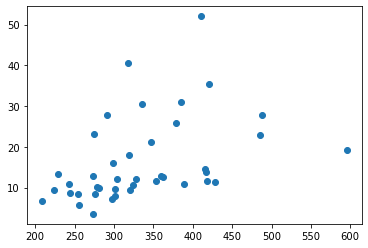

In [25]:
x = df2['average_business_stock'][df2['average_patents'] < 60]
y = df2['average_patents'][df2['average_patents'] < 60]
fig = plt.figure(111)
ax = fig.add_subplot(111)
ax.scatter(x, y)


plt.show() 

In [26]:
df2['Density__2018'] = df2['Density__2018'].astype(float)
var = df2['Density__2018']
lowest = var.quantile(0.25)
med1 = var.quantile(0.5)
med2 = var.quantile(0.75)
conditions = [
    (var < lowest),
    (var >= lowest) & (var < med1),
    (var >= med1) & (var < med2)
    (var >= med2)
]
values = ['lowest', 'med1', 'med2', 'high']
df['filter'] = np.select(conditions, values)

TypeError: 'Series' object is not callable

In [ ]:
var = df2['Density__2018']
lowest = var.quantile(0.25)
med1 = var.quantile(0.5)
med2 = var.quantile(0.75)

        

In [ ]:
var = df2['Density__2018']
lowest = var.quantile(0.25)
print(lowest)
med1 = var.quantile(0.5)
print(med1)
med2 = var.quantile(0.75)
print(med2)
df2['filter'] = ''

for i in df2['filter']:
    if  var < lowest:
        i == 'lowesst'
    elif var < med1:
        i == 'meds1'
    elif var < med2:
        i == 'meds1'
    else:
        i == 'highs'



In [ ]:
for index, i in df2['Density__2018'].iteritems():
        if i > med2:
                df2['filter'] == 'higher',
        elif i > med1 & i < med2:
                df2['filter'] == 'med1',
        elif i > lowest & i < med1:
                df2['filter'] == 'med2',
        else:
                df2['filter'] == 'low'


In [ ]:
#https://www.uspto.gov/web/offices/ac/ido/oeip/taf/cls_cbsa/allcbsa_gd.htm

In [ ]:
#webscrape for patents by US metropolitan statistical area

In [446]:
url = 'https://www.uspto.gov/web/offices/ac/ido/oeip/taf/cls_cbsa/allcbsa_gd.htm'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables=soup.find_all("table")

right_table=soup.find_all("table", class_="table")
actual_table=soup.find_all("tbody")
table=soup.find('tbody')
headings=table.findAll('th',text="Area")
headings_list=[i.text for i in headings]
headings_list
values=table.findAll('td')

regional_level=[]
id_code=[]
regional_title=[]
yr2000=[]
yr2001=[]
yr2002=[]
yr2003=[]
yr2004=[]
yr2005=[]
yr2006=[]
yr2007=[]
yr2008=[]
yr2009=[]
yr2010=[]
yr2011=[]
yr2012=[]
yr2013=[]
yr2014=[]
yr2015=[]
total=[]


for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==20:
        regional_level.append(cells[0].find(text=True))
        id_code.append(cells[1].find(text=True))
        regional_title.append(cells[2].find(text=True))
        yr2000.append(cells[3].find(text=True))
        yr2001.append(cells[4].find(text=True))
        yr2002.append(cells[5].find(text=True))
        yr2003.append(cells[6].find(text=True))
        yr2004.append(cells[7].find(text=True))
        yr2005.append(cells[8].find(text=True))
        yr2006.append(cells[9].find(text=True))
        yr2007.append(cells[10].find(text=True))
        yr2008.append(cells[11].find(text=True))
        yr2009.append(cells[12].find(text=True))
        yr2010.append(cells[13].find(text=True))
        yr2011.append(cells[14].find(text=True))
        yr2012.append(cells[15].find(text=True))
        yr2013.append(cells[16].find(text=True))
        yr2014.append(cells[17].find(text=True))
        yr2015.append(cells[18].find(text=True))
        total.append(cells[19].find(text=True))

dfip=pd.DataFrame(regional_level,columns=['regional_level'])
dfip['id_code']=id_code
dfip['regional_title']=regional_title
dfip['2000']=yr2000
dfip['2001']=yr2001
dfip['2002']=yr2002
dfip['2003']=yr2003
dfip['2004']=yr2004
dfip['2005']=yr2005
dfip['2006']=yr2006
dfip['2007']=yr2007
dfip['2008']=yr2008
dfip['2009']=yr2009
dfip['2010']=yr2010
dfip['2011']=yr2011
dfip['2012']=yr2012
dfip['2013']=yr2013
dfip['2014']=yr2014
dfip['2015']=yr2015
dfip['total']=total
for i in dfip.columns:
    dfip[i] = dfip[i].str.replace('\n',' ')
dfip

,regional_level,id_code,regional_title,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total
0,Metropolitan Statistical Area,141940,"San Jose-Sunnyvale-Santa Clara, CA",5812,6377,6433,6838,6885,6502,8129,7191,7213,7840,10074,10256,11517,12899,14894,14618,143473
1,Metropolitan Statistical Area,135620,"New York-Northern New Jersey-Long Island, NY-N...",5689,5638,5479,5233,4717,3959,4951,4285,4399,4605,6383,6252,6944,7886,8406,7754,92577
2,Metropolitan Statistical Area,141860,"San Francisco-Oakland-Fremont, CA",3625,3800,4030,4084,4026,3726,4810,4337,4298,4711,6290,6468,7403,8721,9920,9732,89981
3,Metropolitan Statistical Area,131100,"Los Angeles-Long Beach-Santa Ana, CA",3877,3995,3889,4057,3959,3674,4445,3696,3594,3864,4992,5154,5871,6271,6571,6476,74381
4,Metropolitan Statistical Area,114460,"Boston-Cambridge-Quincy, MA-NH",2972,3133,3103,3465,3195,2768,3461,3027,3039,3165,4330,4537,4986,5610,5913,5949,62653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Undetermined Statistical Area,000148,"Undetermined Statistical Areas, TX",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1019,Undetermined Statistical Area,000149,"Undetermined Statistical Areas, UT",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1020,Undetermined Statistical Area,000153,"Undetermined Statistical Areas, WA",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1021,Undetermined Statistical Area,,-- Subtotal --,0,1,0,1,2,2,7,6,11,6,2,0,0,2,0,0,40


In [452]:
dfip[['city_name', 'state_code']] = dfip['regional_title'].str.split(',',1,expand=True)
dfip['regional_level'] = dfip['regional_level'].str.replace(' ','_')
metroip = dfip[dfip['regional_level'] == 'Metropolitan_Statistical_Area_']
us = dfip[dfip['regional_level'] == 'ALL_AREAS_']

metroip = metroip[0:374] # This is to drop the row that totals all MSA rows.
metroip['2000'] = metroip['2000'].astype(float)
metroip['2015'] = metroip['2015'].astype(float)
#metroip['00-15gr-%'] = ((metroip['2015']/metroip['2000'])**(1/16))-1
for i in np.linspace(2001,2014,14, dtype='int'):
    #print(i)
    metroip[str(i)] = metroip[str(i)].astype('float')
metroip2 = metroip[~metroip.isin([np.nan, np.inf, -np.inf]).any(1)] # This is to remove all rows with inf or nan values in the 00-15gr-% column. Without values we cannot do any graphical analysis on these rows.

In [ ]:
#https://www.census.gov/data/tables/time-series/dec/c2010sr-01.html

In [347]:
data = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\copy of cbsa-report-chapter-3-data.xlsx', encoding='cp1252')
df = data[8:373]
df.columns=['MSA_id', 'MSA', 'area_type','pop_00', 'pop_10','land_area_miles2_10','pop_density_00','pop_density_10','pop_weighted_00','pop_weighted_10','change_00_10']
df.MSA_id = df.MSA_id.astype(float)
df['MSA_id2'] = df['MSA_id'] + 100000
data.columns=['MSA_id', 'MSA', 'area_type','pop_00', 'pop_10','land_area_miles2_10','pop_density_00','pop_density_10','pop_weighted_00','pop_weighted_10','change_00_10']
df.pop_density_00.sort_values( ascending=False)

<ipython-input-347-d9d984365070>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MSA_id2'] = df['MSA_id'] + 100000


243    2740.13
206    2550.43
308    1669.16
342    1562.01
153    1458.45
        ...   
62     12.4585
17     12.1465
187    11.6468
115    11.2889
120    6.24742
Name: pop_density_00, Length: 365, dtype: object

Index(['regional_level', 'id_code', 'regional_title', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'total', 'city_name', 'state_code',
       'MSA_id', 'MSA', 'area_type', 'pop_00', 'pop_10', 'land_area_miles2_10',
       'pop_density_00', 'pop_density_10', 'pop_weighted_00',
       'pop_weighted_10', 'change_00_10', 'MSA_id2', 'gr_pop_density_00_10',
       'gr_weighted_pop_density', 'gr_pop_00_10'],
      dtype='object')


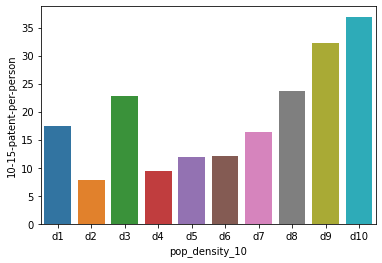

In [536]:
#df.MSA_id2 = df.MSA_id2.astype('str')
metroip2.id_code = metroip2.id_code.astype('float')
mdf = pd.merge(metroip2,df,left_on='id_code',right_on='MSA_id2')
mdf3 = mdf
mdf['gr_pop_density_00_10'] = ((mdf['pop_density_10']/mdf['pop_density_00'])**(1/11))-1
mdf['gr_weighted_pop_density'] = ((mdf['pop_weighted_10']/mdf['pop_weighted_00'])**(1/11))-1
mdf['gr_pop_00_10'] = ((mdf['pop_10']/mdf['pop_00'])**(1/11))-1
mdf = mdf.sort_values(['pop_density_10'], ascending=False)
print(mdf.columns)

mdf['pop_density_10'] = pd.qcut(mdf['pop_density_10'], q=10, labels=['d1', 'd2', 'd3' , 'd4', 'd5', 'd6' , 'd7', 'd8', 'd9', 'd10'])
mdf2 = mdf.groupby(by='pop_density_10',axis=0).sum()
mdf2['freq'] = mdf.groupby(by='pop_density_10',axis=0).size()
#mdf = mdf.sort_values(['pop_density_10'], ascending=True)
mdf2.drop(['id_code','MSA_id','MSA_id2'],axis=1,inplace=True)
ust =  us['2010'].astype('float') + us['2011'].astype('float') + us['2012'].astype('float') + us['2013'].astype('float') + us['2014'].astype('float') + us['2015'].astype('float')
mdf2['00-15-total'] = ((mdf2['2000'] + mdf2['2001'] + mdf2['2002'] + mdf2['2003'] + mdf2['2004'] + mdf2['2005'] + mdf2['2006'] + mdf2['2007'] + mdf2['2008'] + mdf2['2009'] + mdf2['2010'] + mdf2['2011'] + mdf2['2012'] + mdf2['2013'] + mdf2['2014'] + mdf2['2015']) / 1592166)*100
mdf2['10-15-total'] = (mdf2['2010'] + mdf2['2011'] + mdf2['2012'] + mdf2['2013'] + mdf2['2014'] + mdf2['2015'])
mdf2['10-15-patent-per-person'] = (mdf2['10-15-total'] / mdf2['pop_10'])*10000 #This is to calculate patent per 10,000 people
mdf2['10-15-%-total'] = (mdf2['10-15-total'] / 756535.0)*100
mdf2['00-15gr-%'] = ((mdf2['2015']/mdf2['2000'])**(1/16))-1
mdf2['10-15gr-%'] = ((mdf2['2015']/mdf2['2010'])**(1/6))-1
mdf2.reset_index(inplace=True)
sns.barplot(data=mdf2,x='pop_density_10',y='10-15-patent-per-person')

In [500]:
mdf = mdf.sort_values(['pop_00'], ascending=False)
dat = mdf[0:300]
ax = sns.scatterplot(x='pop_weighted_00',y='00-15gr-%',data=dat, hue='pop_10')
#plt.text(x = dat['gr_pop_density_00_10'], y = dat['00-15gr-%'])
#plt.text(x=dat['gr_pop_density_00_10'],y=dat['00-15gr-%'],fontdict=dict(alpha=0.5, size=11))
#sns.barplot(data=dat,x='MSA',y='gr_pop_density_00_10')
plt.ylim(-0.1,0.2)

ValueError: Could not interpret input '00-15gr-%'

Index(['regional_level', 'id_code', 'regional_title', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'total', 'city_name', 'state_code',
       'MSA_id', 'MSA', 'area_type', 'pop_00', 'pop_10', 'land_area_miles2_10',
       'pop_density_00', 'pop_density_10', 'pop_weighted_00',
       'pop_weighted_10', 'change_00_10', 'MSA_id2', 'gr_pop_density_00_10',
       'gr_weighted_pop_density', 'gr_pop_00_10', '10-15-total',
       'patentperpop10', '15_share', 'pop_10_share'],
      dtype='object')


,regional_level,id_code,regional_title,2000,2001,2002,2003,2004,2005,2006,...,pop_weighted_10,change_00_10,MSA_id2,gr_pop_density_00_10,gr_weighted_pop_density,gr_pop_00_10,10-15-total,patentperpop10,15_share,pop_10_share
1,Metropolitan_Statistical_Area_,135620.0,"New York-Northern New Jersey-Long Island, NY-N...",5689.0,5638.0,5479.0,5233.0,4717.0,3959.0,4951.0,...,31251.435610,-432.171,135620.0,0.00280864,-0.00124777,0.00280864,43625.0,0.002309,5.502100,6.120610
3,Metropolitan_Statistical_Area_,131100.0,"Los Angeles-Long Beach-Santa Ana, CA",3877.0,3995.0,3889.0,4057.0,3959.0,3674.0,4445.0,...,12113.876664,-328.122,131100.0,0.00334877,-0.00242669,0.00334877,35335.0,0.002754,4.595254,4.155149
5,Metropolitan_Statistical_Area_,116980.0,"Chicago-Joliet-Naperville, IL-IN-WI",3101.0,2981.0,2772.0,2616.0,2562.0,2246.0,2689.0,...,8613.394800,-1216.24,116980.0,0.00356086,-0.0119358,0.00356086,21206.0,0.002241,2.773757,3.064370
10,Metropolitan_Statistical_Area_,119100.0,"Dallas-Fort Worth-Arlington, TX",2116.0,2130.0,1926.0,1884.0,1959.0,1685.0,2016.0,...,3909.282422,-385.936,119100.0,0.0193338,-0.00852244,0.0193338,16073.0,0.002523,2.147196,2.063762
12,Metropolitan_Statistical_Area_,137980.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2185.0,2225.0,2091.0,1934.0,1706.0,1478.0,1806.0,...,7773.154881,-291.135,137980.0,0.00435106,-0.00333711,0.00435106,14106.0,0.002365,1.672485,1.932123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Metropolitan_Statistical_Area_,141780.0,"Sandusky, OH",7.0,8.0,8.0,3.0,11.0,8.0,5.0,...,1782.698676,-237.111,141780.0,-0.00286565,-0.0112881,-0.00286565,72.0,0.000934,0.006386,0.024965
157,Metropolitan_Statistical_Area_,118020.0,"Columbus, IN",60.0,51.0,47.0,52.0,42.0,39.0,37.0,...,1083.779445,-2.79831,118020.0,0.0065979,-0.000234396,0.0065979,387.0,0.005039,0.064572,0.024873
355,Metropolitan_Statistical_Area_,116220.0,"Casper, WY",2.0,2.0,4.0,4.0,3.0,4.0,2.0,...,2003.557671,-31.0688,116220.0,0.0114994,-0.00139791,0.0114994,21.0,0.000278,0.003548,0.024438
361,Metropolitan_Statistical_Area_,130300.0,"Lewiston, ID-WA",3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,1443.621690,12.2994,130300.0,0.00448875,0.000778147,0.00448875,15.0,0.000246,0.002129,0.019721


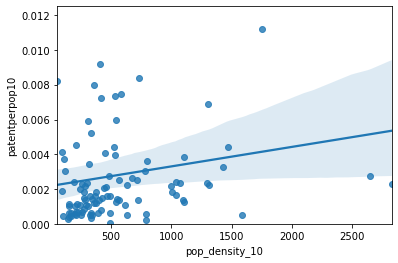

In [534]:
mdf3 = mdf3.sort_values(['pop_00'], ascending=False)
dat = mdf3[0:300]
mdf3['10-15-total'] = mdf3['2010'] + mdf3['2011'] + mdf3['2012'] + mdf3['2013'] + mdf3['2014'] + mdf3['2015']
mdf3['patentperpop10'] = mdf3['10-15-total'] / mdf3['pop_10']
mdf3['15_share'] = (mdf3['2015']/140928)*100
mdf3['pop_10_share'] = (mdf3['pop_10']/308745538.0)*100
mdf3 = mdf3.sort_values(['pop_10_share'], ascending=False)
ax2 = sns.regplot(x='pop_density_10',y='patentperpop10',data=mdf3[0:100])
plt.ylim(0,0.0125)
print(mdf3.columns)
mdf3

In [325]:

mdf = mdf.sort_values(['pop_10_share'], ascending=False)
mdf
mdf['pop_10'][0:20]

1     18897109.0
3     12828837.0
5      9461105.0
10     6371773.0
12     5965343.0
13     5946800.0
15     5582170.0
21     5564635.0
16     5268860.0
4      4552402.0
2      4335391.0
9      4296250.0
50     4224851.0
17     4192887.0
7      3439809.0
8      3279833.0
6      3095313.0
28     2812896.0
45     2783243.0
27     2710489.0
Name: pop_10, dtype: float64

In [314]:
#https://data.census.gov/cedsci/table?q=college%20attainment&t=Educational%20Attainment&g=0100000US%243100000,%243140000&y=2010&tid=ACSST5Y2010.S1501
#This dataset is just for 2010
data2 = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\ACSST5Y2010.S1501-2021-12-17T173448.csv', encoding='cp1252')
data2 = data2.T
data2 = data2.rename(columns=data2.iloc[0])
data2.index.rename('msa', inplace=True)

data2.columns

data3 = data2[1:]
data4 = data3["Bachelor's degree or higher"]
data4 = data4.iloc[:,0:1]
data4 = data4[data4.index.str.contains('Metro Area!!Total!!Estimate')]
#every value is the % of 2010 population with a bachelors degree or higher.
data4.index = data4.index.str.rstrip('Metro Area!!Total!!Estimate')
data4

,Bachelor's degree or higher
msa,
"Abilene, TX",7.60%
"Aguadilla-Isabela-San Sebasti?n, PR",6.00%
"Akron, OH",10.80%
"Albany, G",3.70%
"Albany-Schenectady-Troy, NY",14.10%
...,...
"San Francisco-San Mateo-Redwood City, CA Metro Division; San Francisco-Oakland-Fremont, C",20.40%
"Seattle-Bellevue-Everett, WA Metro Division; Seattle-Tacoma-Bellevue, W",14.20%
"Tacoma, WA Metro Division; Seattle-Tacoma-Bellevue, W",5.80%
